<center><h2>Artificial and Computational Intelligence (Assignment - 2)</h2></center>

## Problem Statement

As part of the 2nd Assignment, we'll implement Bayesian Networks and also learn to use the pomegranate library.

You are required to create a bayesian network model which would help you predict the probability. The detailed problem description is attached as a PDF as a part of this assignment along with the marking scheme.  

### What is a Bayesian Network ?

A Bayesian network, Bayes network, belief network, decision network, Bayes(ian) model or probabilistic directed acyclic graphical model is a probabilistic graphical model (a type of statistical model) that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. Given symptoms, the network can be used to compute the probabilities of the presence of various diseases. 

### Dataset

The dataset can be downloaded from https://drive.google.com/drive/folders/1oMtKmmvPkN4O8DmrHMJe6M8CbB93Z5kw .You can access it only using your BITS IDs. Also, the same dataset is attached along with the assignment. 

#### Dataset Description
##### Sample Tuple

Y	won	5wickets	lost	2nd	vWest_Indies	Home	6-Nov-11

##### Explanation
- The first column represents if Ashwin was in the playing 11 or not. 
- The second column represents the Result of the match . win indicates India won the match.
- The third column represents the Margin of victory / losss.
- The fourth column represents the results of the toss. won indicates India won the toss. 
- The fifth column represents the batting order. If India batted 1st or 2nd. 
- The sixth column represents the opponent.
- The seventh column represents the location of the match. If the match was held in Home(India) or away. 
- The last column represents the start date of the match.


### Evaluation
We wish to evaluate based on 
- coding practices being followed
- commenting to explain the code and logic behind doing something
- your understanding and explanation of data
- how good the model would perform

# BITS RollNumbers , Names. 

2018ab04713@wilp.bits-pilani.ac.in, SELVA KUMAR VR

2018ab04696@wilp.bits-pilani.ac.in, ARPITA RATHI

2018ab04647@wilp.bits-pilani.ac.in , RUBY THOMAS

2018ab04517@wilp.bits-pilani.ac.in, PREETAM KUMAR


In [2]:
#Import libraries
import numpy as np 
import pandas as pd
from pomegranate import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [3]:
#Read data
match_df = pd.read_excel('India_Test_Stats.xlsx')
match_df.head()

,Ashwin,Result,Margin,Toss,Bat,Opposition,Location,Start Date
0,Y,won,5 wickets,lost,2nd,v West Indies,Home,2011-11-06
1,Y,won,inns & 15 runs,won,1st,v West Indies,Home,2011-11-14
2,Y,draw,-,lost,2nd,v West Indies,Home,2011-11-22
3,Y,lost,122 runs,lost,2nd,v Australia,Away,2011-12-26
4,Y,lost,inns & 68 runs,won,1st,v Australia,Away,2012-01-03


In [4]:
#Pre-process data (Whatever you feel might be required)
#drop columns that are not required
X = match_df.drop(labels=['Margin', 'Opposition', 'Start Date'], axis = 1)
X.head()
print(X.columns)

Index(['Ashwin', 'Result', 'Toss', 'Bat', 'Location'], dtype='object')


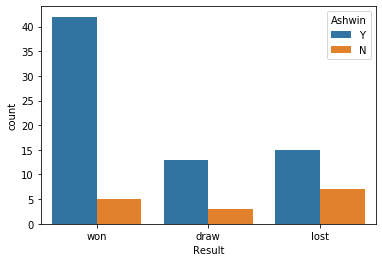

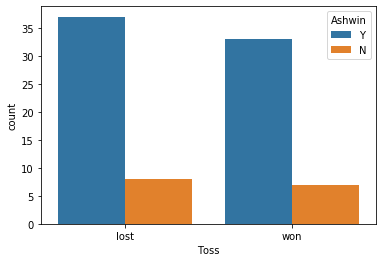

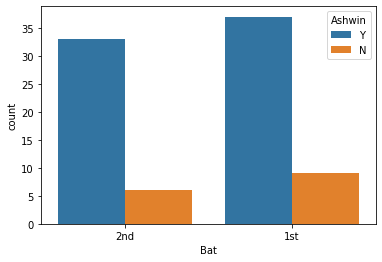

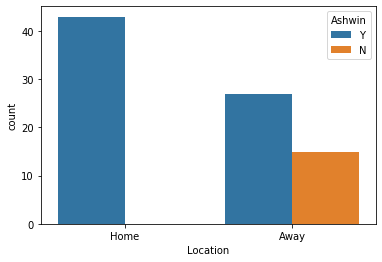

In [5]:
#Data Description

cat_cols = ['Result','Toss','Bat','Location']
for i in cat_cols:
    sns.countplot(X[i], hue = X['Ashwin'])
    plt.show()

In [6]:
#Construction of Bayesian Network goes here 

#Common functions

def getDataFrame(data_arr,col_names_lst):
        df = pd.DataFrame(data_arr,columns=[col_names_lst])
        df.reset_index()
        df.columns = col_names_lst
        
        return df
        
def getValueCount(data_arr,col_name):
    df = getDataFrame(data_arr,[col_name])
    
    return df[col_name].value_counts().to_dict()

#['Ashwin', 'Result', 'Toss', 'Bat', 'Location']


In [7]:
#Solution for part 1 
#Solution for part 1 
def getMarginalProb(data_arr,col_name):
    dict = getValueCount(data_arr,col_name)
    
    
    dict.update((k, round(v / len(data_arr),5)) for k,v in dict.items())
    return dict 

#######################################Test Marginal Probability Function###########################
arr = np.array(X['Ashwin'])
mp = getMarginalProb(arr,'Ashwin')
print(mp)

arr = np.array(X['Result'])
mp = getMarginalProb(arr,'Result')
print(mp)


{'Y': 0.82353, 'N': 0.17647}
{'won': 0.55294, 'lost': 0.25882, 'draw': 0.18824}


In [8]:
#Solution for part 2 

def getCartisianProb(data_arr,col_names_lst):

    rst = []
    df = getDataFrame(data_arr,col_names_lst)
    
    for i in col_names_lst:
        rst.append(list(set(df[i])))
    
    #print(rst)

    index = pd.MultiIndex.from_product(rst, names = col_names_lst)

    df_rst = pd.DataFrame(index = index).reset_index()
    #df_rst['count'] = 0.0
    #print(df_rst)
    return df_rst

def getConditionalProb(data_arr,col_names_lst):
    df = getDataFrame(data_arr,col_names_lst)
 
    ##Generation dataframe that is cartisian of all columns
    ##However, given dataset does not contain cartisian of all columns together.
    ##Below method getCartisianProb will identify addition rows that are missing from dataset
    
    df_cart = getCartisianProb(data_arr,col_names_lst)
    df_cart = df_cart.merge(df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
    df_cart = df_cart.drop(['_merge'], axis = 1) 
    ############################################################################
    print('######################Additional rows################################')
    print(df_cart)
    print('#####################################################################')
    ############################################################################
    print(df)
    
    frames = [df , df_cart]
    df = pd.concat(frames)
    df.reset_index()
    
    ##Last column in column array will conditional column
    ##all columns before last one will be dependency columns
    cond_cols = col_names_lst[-1]
    depd_cols = col_names_lst[:-1]
    #print(cond_cols,depd_cols)
    #print(df.head())
  
    ##Calculate group by for columns
    df_grp = df.groupby(col_names_lst)
    df_cnt = df_grp.size().reset_index(name='count')
    print(df_cnt.head())
    ##Calculate Marginal count of dependency columns
    df_depd_grp = df.groupby(depd_cols)
    df_depd_cnt = df_depd_grp.size().reset_index(name='CondValuecount')
    print(df_depd_cnt.head())
    
    result = pd.merge(df_cnt,df_depd_cnt,how='inner')
    
    
    #df_marg = getValueCount(np.array(df[depd_cols]),depd_cols)
    
    ##Associate conditional fields distinct count to dataframe.
    ##In this case column 'Ashwini' is conditional field , there
    ##add dist value count to dataframe
    
    #df_cnt['CondValueCount'] = df_cnt[depd_cols].map(df_marg)
    result['CondProb'] = round(result['count']/result['CondValuecount'],5)
    #print(result)
    col_names_lst.append('CondProb')
    
    return result[col_names_lst].as_matrix()  
    #return None    
#######################################Test Conditional Probability Function###########################

arr = np.c_[X['Result'], X['Toss'], X['Bat'], X['Location'], X['Ashwin']]

col_name_list = [ 'Result', 'Toss', 'Bat', 'Location','Ashwin']

cp = getConditionalProb(arr,col_name_list)

print(cp)


######################Additional rows################################
    Result  Toss  Bat Location Ashwin
8      won   won  1st     Home      N
26     won   won  2nd     Away      N
27     won   won  2nd     Away      Y
28     won   won  2nd     Home      N
36     won  lost  1st     Home      N
37     won  lost  1st     Home      Y
38     won  lost  2nd     Away      N
39     won  lost  2nd     Away      Y
40     won  lost  2nd     Home      N
60    draw   won  1st     Home      N
63    draw   won  2nd     Away      Y
64    draw   won  2nd     Home      N
66    draw  lost  1st     Away      N
67    draw  lost  1st     Away      Y
68    draw  lost  1st     Home      N
70    draw  lost  2nd     Away      N
75    draw  lost  2nd     Home      N
84    lost   won  1st     Home      N
88    lost   won  2nd     Away      Y
89    lost   won  2nd     Home      N
90    lost   won  2nd     Home      Y
94    lost  lost  1st     Home      N
95    lost  lost  1st     Home      Y
107   lost  lost  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [9]:
#Solution for part 3 

#Generate Marginal probability
Ashwinarr = np.array(X['Ashwin'])
AshwinMargin = getMarginalProb(Ashwinarr,'Ashwin')
#print('Ashwin Margin Prob: ', AshwinMargin)

Resultarr = np.array(X['Result'])
ResultMargin = getMarginalProb(Resultarr,'Result')
#print('Result Margin Prob: ', ResultMargin)

Tossarr = np.array(X['Toss'])
TossMargin = getMarginalProb(Tossarr,'Toss')
#print('Toss Margin Prob: ', TossMargin)

Batarr = np.array(X['Bat'])
BatMargin = getMarginalProb(Batarr,'Bat')
#print('Bat Margin Prob: ', BatMargin)

Locarr = np.array(X['Location'])
LocMargin = getMarginalProb(Locarr,'Location')
#print('Location Margin Prob: ', LocMargin)


Ashwin = DiscreteDistribution(AshwinMargin)#,name='Ashwin')
Result = DiscreteDistribution(ResultMargin)#,name='Result')
Toss = DiscreteDistribution(TossMargin)#, name='Toss')
Bat = DiscreteDistribution(BatMargin)#, name='Bat')
Location = DiscreteDistribution(LocMargin)#, name='Location')


#print(Ashwin.to_json())
#print(Result.to_json())
#print(Toss.to_json())
#print(Bat.to_json())
#print(Location.to_json())

######################Conditional Probability###############################################

############Below is network created ##############################
#
#     Location                 Toss
#        |                      |
#     Aswhin Playing           Batting
#        |                      | 
#        |                      |
#        ________________________
#                  |
#               Result


#########################Conditional probability of Ashwin playing given Location
LocAshwinarr = np.c_[X['Location'] , X['Ashwin']]
LocAshwin_col_name_list = [ 'Location', 'Ashwin']
LocAshwinConditional = getConditionalProb(LocAshwinarr,LocAshwin_col_name_list)

LocAshwin = ConditionalProbabilityTable(LocAshwinConditional,[Location])
#print('Ashwin Margin prob: ',AshwinMargin)
print('Location Margin prob: ',LocMargin)
print('P(Ashwin Playing | Location): \n',LocAshwinConditional)
#print(LocAshwin.to_json())

#########################Conditional probability of Bat given Toss
BatTossarr = np.c_[X['Toss'] , X['Bat'] ]
BatToss_col_name_list = [ 'Toss', 'Bat']
BatTossConditional = getConditionalProb(BatTossarr,BatToss_col_name_list)
BatToss = ConditionalProbabilityTable(BatTossConditional,[Toss])
print('Location Margin prob: ',TossMargin)
print('P(Bat Order | Toss): \n',BatTossConditional)
#print(BatToss.to_json())

#########################Conditional probability of Result given (Ashwin and Bat)
Resultarr = np.c_[X['Ashwin'],X['Bat'], X['Result']]
Result_col_name_list = [ 'Ashwin','Bat', 'Result']
ResultConditional = getConditionalProb(Resultarr,Result_col_name_list)
Result = ConditionalProbabilityTable(ResultConditional,[LocAshwin, BatToss])

print('=================================================================')
print(Result.to_json())
print('=================================================================')
#print('P(Result | Locatin, Ashwin, Toss, Bat): \n',ResultConditional)    


######################Additional rows################################
   Location Ashwin
42     Home      N
#####################################################################
   Location Ashwin
0      Home      Y
1      Home      Y
2      Home      Y
3      Away      Y
4      Away      Y
..      ...    ...
80     Home      Y
81     Home      Y
82     Home      Y
83     Home      Y
84     Home      Y

[85 rows x 2 columns]
  Location Ashwin  count
0     Away      N     15
1     Away      Y     27
2     Home      N      1
3     Home      Y     43
  Location  CondValuecount
0     Away              42
1     Home              44
Location Margin prob:  {'Home': 0.50588, 'Away': 0.49412}
P(Ashwin Playing | Location): 
 [['Away' 'N' 0.35714]
 ['Away' 'Y' 0.64286]
 ['Home' 'N' 0.02273]
 ['Home' 'Y' 0.97727]]
######################Additional rows################################
Empty DataFrame
Columns: [Toss, Bat]
Index: []
#####################################################################

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [25]:
##Node for Location and Toss
##Node for Location and Toss
s1 = State(Location, name="Location")
s2 = State(LocAshwin,name='LocAshwin')
s3 = State(Toss, name="Toss")
s4 = State(BatToss,name='BatToss')
s5 = State(Result,name='Result')

model = BayesianNetwork("AshwinSelection")
model.add_states(s1,s2,s3,s4,s5)
model.add_edge(s1,s2)
model.add_edge(s2,s5)
model.add_edge(s3,s4)
model.add_edge(s4,s5)
model.bake()

In [31]:
#Solution for part 4
# a)  India winning, batting 2nd, Ashwin playing 

print('#############India winning, batting 2nd, Ashwin playing#################')
print(model.predict_proba({'Result' : 'won', 'BatToss':'2nd', 'LocAshwin':'Y' }))

# b) India winning, batting 2nd, Ashwin not playing  
print('#############India winning, batting 2nd, Ashwin not playing#################')
print(model.predict_proba({'Result' : 'won', 'BatToss':'2nd', 'LocAshwin':'N' }))

# c) India losing, batting 2nd, Ashwin playing 
print('#############India lost, batting 2nd, Ashwin playing#################')
print(model.predict_proba({'Result' : 'lost', 'BatToss':'2nd', 'LocAshwin':'Y' }))

# d)  India losing, batting 2nd, Ashwin not playing
print('#############India lost, batting 2nd, Ashwin not playing#################')
print(model.predict_proba({'Result' : 'lost', 'BatToss':'2nd', 'LocAshwin':'N' }))
 

#############India winning, batting 2nd, Ashwin playing#################
[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Home" :0.6088205329626181,
            "Away" :0.39117946703738204
        }
    ],
    "frozen" :false
}
 'Y'
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "lost" :0.8974355084365381,
            "won" :0.10256449156346188
        }
    ],
    "frozen" :false
}
 '2nd' 'won']
#############India winning, batting 2nd, Ashwin not playing#################
[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Home" :0.06117323939643045,
            "Away" :0.9388267606035695
        }
    ],
    "frozen" :false
}
 'N'
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        

In [12]:
#Feel free to add cells where necessary. 

<h3><center> Happy Coding!</center></h3>